In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
import pickle
import matplotlib
import seaborn as sns
%matplotlib inline

In [30]:
pd.set_option('display.max_columns', 52)
pd.set_option('display.width', 10)
pd.set_option('display.max_rows', 100)

## Load files

In [2]:
train = pd.read_csv('../consumer_basket_analysis/data/train.csv')
x_test = pd.read_csv('../consumer_basket_analysis/data/test.csv')

In [3]:
train.shape

(316320, 8)

In [10]:
train.head()

,check_id,customer_id,time,category_1,category_2,barcode,count,target
0,eed1876f9ae5798f0835d7892f75c4a1,NaN,10:01,все для компьютеров,2643,4316875210,1,8
1,592f80a1744e13bced5260784b85c340,NaN,10:01,доставка,4463,1200081331,1,4
2,95a46543a4b9af29a40206d18f99fb3f,NaN,10:01,доставка,4124,1200001311,1,4
3,eed1876f9ae5798f0835d7892f75c4a1,NaN,10:01,все для компьютеров,1913,4613510253,1,8
4,107ae1a8613d936460ef9cd923bfe3b9,NaN,10:01,доставка,3856,4900005537,1,4


## Исследуем category_2

In [13]:
train.category_2.unique().shape,train.category_2.min(),train.category_2.max()

((4956,), -1, 5069)

In [21]:
train[train.category_2 == -1]

,check_id,customer_id,time,category_1,category_2,barcode,count,target
37,56d2df4853d42f8967fbf288e33819d1,NaN,10:03,лекарства по рецепту,-1,-1,1,9
46,8b27a88842ef8f43a77474d0a71c03bc,NaN,10:04,прочее,-1,-1,-2,7
50,8b27a88842ef8f43a77474d0a71c03bc,NaN,10:04,прочее,-1,-1,-2,7
75,221efb5d0b724b766e1fd5fe214c66e0,NaN,10:05,лекарства по рецепту,-1,-1,1,9
90,1449e898917299730b91905b3ab6eeab,NaN,10:06,лекарства по рецепту,-1,-1,1,9
127,d929dbdef4aed87dae7a11c86bc6ee35,NaN,10:09,лекарства по рецепту,-1,-1,1,9
128,181072076dfdeeb6060a3e60719b71a8,NaN,10:09,лекарства по рецепту,-1,-1,1,9
142,f87bdc99f7548c4778e95f6cf33aa6fb,NaN,10:10,лекарства по рецепту,-1,-1,1,9
168,1c9fca03cf77038ca276c3e7a2e5e131,NaN,10:13,лекарства по рецепту,-1,-1,1,9
172,1c9fca03cf77038ca276c3e7a2e5e131,NaN,10:13,лекарства по рецепту,-1,-1,1,9


In [ ]:
24fdbda15274d8dc2d6071abf185c689

In [55]:
train[train.check_id =='24fdbda15274d8dc2d6071abf185c689' ]

,check_id,customer_id,time,category_1,category_2,barcode,count,target
8770,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,товары для праздника,2894,6700882840,1,5
8772,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,личная гигиена,4272,1700011856,1,5
8773,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,лекарства по рецепту,-1,-1,1,5
8774,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,личная гигиена,3500,1700002402,1,5
8775,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,лекарства,1022,30067399942,1,5
8779,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,одежда для мальчиков,1371,88530618861,1,5
8780,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,товары для праздника,535,6898150989,1,5
8782,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,личная гигиена,4922,7874202650,1,5
8783,24fdbda15274d8dc2d6071abf185c689,NaN,20:32,одежда для мальчиков,1371,88530618879,1,5


In [ ]:
a117d6cc625f4266be6ffe80fa22ea0a""

In [28]:
train[train.customer_id =='a117d6cc625f4266be6ffe80fa22ea0a' ].head()

,check_id,customer_id,time,category_1,category_2,barcode,count,target
8784,1f4967228f18de2c5cd94b6270d672c5,a117d6cc625f4266be6ffe80fa22ea0a,20:33,свежее и замороженное мясо,606,22006000000,1,20
8785,1f4967228f18de2c5cd94b6270d672c5,a117d6cc625f4266be6ffe80fa22ea0a,20:33,косметика и аксессуары,1953,2006618783,2,20
8786,1f4967228f18de2c5cd94b6270d672c5,a117d6cc625f4266be6ffe80fa22ea0a,20:33,косметика и аксессуары,2908,88679300501,-1,20
8787,1f4967228f18de2c5cd94b6270d672c5,a117d6cc625f4266be6ffe80fa22ea0a,20:33,прочее,-1,-1,1,20
8788,1f4967228f18de2c5cd94b6270d672c5,a117d6cc625f4266be6ffe80fa22ea0a,20:33,товары для животных,1949,2310010776,1,20


- Есть ли доставка в чеке? - Фича

In [49]:
train[(train.category_1 == 'лекарства по рецепту') & (train.category_2 <= 0)]

,check_id,customer_id,time,category_1,category_2,barcode,count,target
37,56d2df4853d42f8967fbf288e33819d1,NaN,10:03,лекарства по рецепту,-1,-1,1,9
75,221efb5d0b724b766e1fd5fe214c66e0,NaN,10:05,лекарства по рецепту,-1,-1,1,9
90,1449e898917299730b91905b3ab6eeab,NaN,10:06,лекарства по рецепту,-1,-1,1,9
127,d929dbdef4aed87dae7a11c86bc6ee35,NaN,10:09,лекарства по рецепту,-1,-1,1,9
128,181072076dfdeeb6060a3e60719b71a8,NaN,10:09,лекарства по рецепту,-1,-1,1,9
142,f87bdc99f7548c4778e95f6cf33aa6fb,NaN,10:10,лекарства по рецепту,-1,-1,1,9
168,1c9fca03cf77038ca276c3e7a2e5e131,NaN,10:13,лекарства по рецепту,-1,-1,1,9
172,1c9fca03cf77038ca276c3e7a2e5e131,NaN,10:13,лекарства по рецепту,-1,-1,1,9
174,1c9fca03cf77038ca276c3e7a2e5e131,NaN,10:13,лекарства по рецепту,-1,-1,1,9
176,1c9fca03cf77038ca276c3e7a2e5e131,NaN,10:13,лекарства по рецепту,-1,-1,1,9


## Рассмотрим category_2

In [89]:
train[train.category_2 == 24].category_1.unique()

array(['товары для сада', 'лекарства',
       'ювелирные изделия и солнечные очки', 'домашний декор'],
      dtype=object)

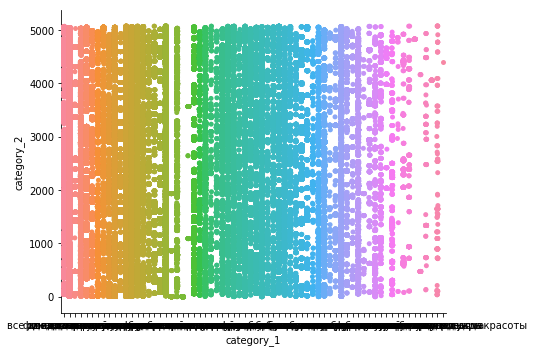

In [90]:
sns.catplot(x='category_1',y = 'category_2', data=train, height=5, aspect=1.5);

In [ ]:
#Найдем category_2 для каждой category 1

In [146]:
cat1_to_cat2 = {}
for i in names_cat_1:
    cat1_to_cat2[i] = train[train.category_1 == i].category_2.unique()

In [147]:
cat1_to_cat2

{'все для компьютеров': array([2643, 1913, 1639, 1430, 4652, 2114, 2361,  101, 4998, 1598, 2304,
        2525, 1095,   64, 4662, 1856,  651, 3037,  606,  442, 4159, 2545,
         825, 3616, 4441, 2961, 4975, 3444, 4091, 1659, 2266, 4076,  756,
        1553, 2433, 4584, 4812, 1403, 1317, 1456, 5048, 2812, 4098, 2907,
        2164, 2460, 2793,  631, 2980,  366,  763, 4725, 2480, 2897, 4189,
          90, 2880, 2870, 1579, 2979, 2275, 1094, 1871, 4049,  354, 4356,
        3259, 4974,  873, 3383, 5005, 3635,  502, 3813, 2201, 2832,  189,
        4831,   67,  514, 2078, 2745, 1624, 2963, 3437, 3557, 1698,   84,
        4770, 2617, 2513, 5033, 4163, 4439, 1949, 2619,  449, 4764,  184,
        2443, 1359, 2584, 1147, 2117, 1051,  474, 1743, 3583, 3368, 2292,
        2116, 3751, 2200, 3615, 2203, 4442, 3958, 1928, 4239, 1003, 2481,
          43,  910, 1479, 4346,  896, 4222, 1342, 1692, 3955, 4397, 2668,
        4953, 2288,  420, 3047, 2237, 3426, 3817, 1809, 3344, 3256, 2885,
        1577, 2

In [132]:
cat2_to_cat1 = {}
for i in cat_2:
    cat2_to_cat1[i] = train[train.category_2 == i].category_1.unique()

In [130]:
cat_2 = train.category_2.unique().tolist()

In [136]:
cat2_to_cat1

{2643: array(['все для компьютеров', 'электроника'], dtype=object),
 4463: array(['доставка', 'электроника', 'хлебобулочные изделия',
        'товары для красоты'], dtype=object),
 4124: array(['доставка'], dtype=object),
 1913: array(['все для компьютеров', 'товары для красоты', 'личная гигиена'],
       dtype=object),
 3856: array(['доставка'], dtype=object),
 4677: array(['финансовые услуги', 'товары для теплиц', 'игровые приставки',
        'ванна и душ'], dtype=object),
 3955: array(['одежда для мужчин', 'товары для развлечений',
        'все для компьютеров', 'товары для животных'], dtype=object),
 3624: array(['молочные продукты', 'личная гигиена', 'игрушки', 'женская одежда',
        'товары для сада', 'ванна и душ'], dtype=object),
 2777: array(['картины'], dtype=object),
 4220: array(['домашний декор', 'ювелирные изделия и солнечные очки'],
       dtype=object),
 1370: array(['детские товары', 'туалетная бумага', 'косметика и аксессуары',
        'игровые приставки', 'одежда 

In [149]:
cat1_to_cat2['женские носки']

array([1465, 3614,  296, 1068, 4989, 3089, 2314, 2478, 3564,  738, 3567,
        481, 1022,  888,  423,  497, 1873, 4351,  620, 2487,  335, 4929,
       3231, 3402, 5066, 3507, 1414,  684, 3374, 1965,  550, 4277, 4038,
       4732, 1360, 4835, 3355, 4357, 2301,  417, 2604, 1179,   71, 3970,
       1434,  459, 2405, 4740, 2432,   36, 2915, 4604, 3092, 4815, 1713,
       4237, 2728,  656, 4688, 4866, 1286, 2554, 1801, 1131, 2436, 1280,
       1744, 1036,  920, 3714, 4401, 2758, 3005, 2623,  109, 2341, 4060,
        943, 3053], dtype=int64)

In [168]:
for i in cat1_to_cat2['крупы, каши, орехи']:
    print(cat2_to_cat1[i])

['крупы, каши, орехи']
['крупы, каши, орехи']
['крупы, каши, орехи']
['крупы, каши, орехи' 'товары для автомобиля' 'алкоголь' 'фрукты и овощи'
 'обувь' 'товары для кухни' 'ювелирные изделия и солнечные очки']
['крупы, каши, орехи']
['крупы, каши, орехи' 'товары для красоты' 'доставка']
['крупы, каши, орехи' 'морепродукты' 'лекарства' 'одежда для мужчин'
 'обувь' 'одежда для малышей']
['крупы, каши, орехи']
['крупы, каши, орехи' 'свежая еда' 'товары для дома' 'доставка'
 'фрукты и овощи']
['крупы, каши, орехи']
['крупы, каши, орехи']
['крупы, каши, орехи' 'косметика и аксессуары']
['крупы, каши, орехи' 'обувь' 'доставка' 'товары для дома']
['крупы, каши, орехи']
['крупы, каши, орехи' 'доставка']
['крупы, каши, орехи']
['крупы, каши, орехи']
['крупы, каши, орехи' 'товары для кухни' 'доставка']
['алкоголь' 'крупы, каши, орехи' 'лекарства' 'товары для кухни'
 'нижнее белье' 'игрушки']
['косметика и аксессуары' 'крупы, каши, орехи' 'фрукты и овощи'
 'постельные принадлежности']
['крупы, каш

In [201]:
#создадим лист листов
check = []
graf = {}
for i in cat1_to_cat2['молочные продукты']:
    check.append(list(cat2_to_cat1[i]))

In [202]:
flat_check = [item for sublist in check for item in sublist]

In [211]:
global_graf = {}
for i in train.category_1.unique():
    check = []
    for cat_1 in cat1_to_cat2[i]:
        check.append(list(cat2_to_cat1[cat_1]))
    flat_check = [item for sublist in check for item in sublist]
    global_graf[i] = list(set(train.category_1.unique()) - set(flat_check))

In [212]:
global_graf

{'все для компьютеров': ['велосипеды',
  'товары для здоровья и красоты',
  'колготки и чулки',
  'прочее',
  'камеры и аксессуары',
  'финансовые услуги',
  'лекарства по рецепту',
  'большие товары для дома',
  'женские носки',
  'оптические линзы',
  'фурнитура',
  'молочные продукты',
  'хлебобулочные изделия'],
 'доставка': ['интимные товары',
  'велосипеды',
  'товары для здоровья и красоты',
  'другое',
  'прочее',
  'мужская одежда',
  'лекарства по рецепту',
  'большие товары для дома',
  'одежда для беременных',
  'оптические линзы',
  'купальники',
  'сезонные товары'],
 'финансовые услуги': ['офисные принадлежности',
  'ювелирные изделия и солнечные очки',
  'товары для дома',
  'большие товары для дома',
  'обувь',
  'женские носки',
  'фурнитура',
  'молочные продукты',
  'интимные товары',
  'прочее',
  'книги и журналы',
  'камеры и аксессуары',
  'пижамы',
  'запакованная еда',
  'морепродукты',
  'постельные принадлежности',
  'все для компьютеров',
  'товары для живо

In [213]:
import networkx as nx

In [214]:
G=nx.Graph(global_graf)

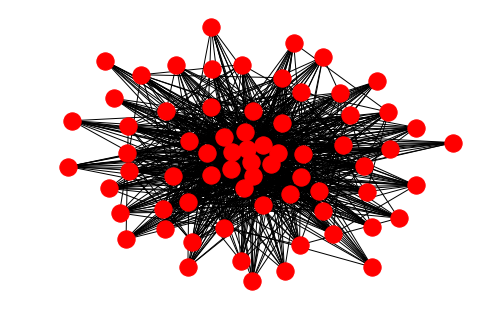

In [215]:
nx.draw(G)

In [224]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=100, facecolor='w', edgecolor='k')

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

In [237]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

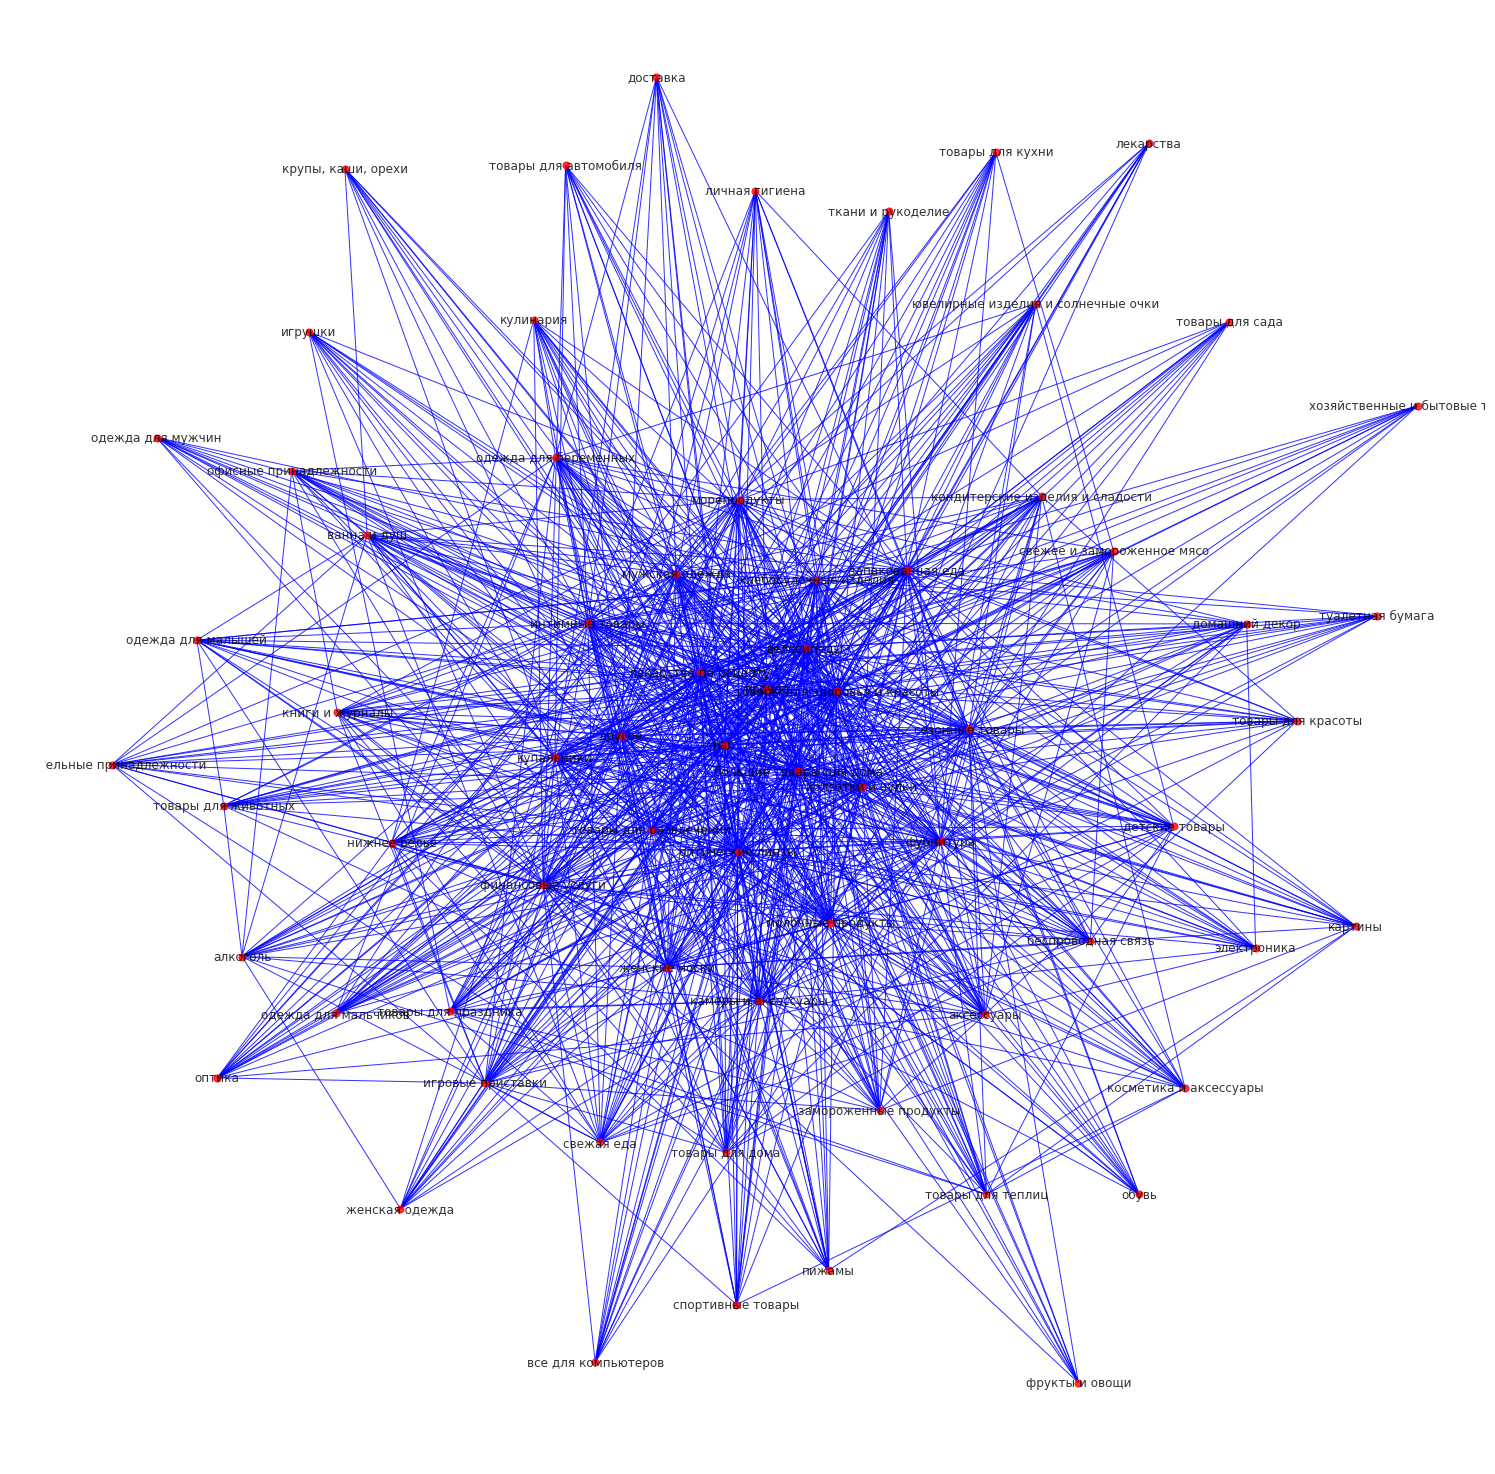

In [238]:
nx.draw(G,with_labels=True, nodecolor='r',edge_color='b',alpha= 0.8, node_size=50)

In [167]:
train.groupby('category_1').count().sort_values('target',ascending = False).head()

,check_id,customer_id,time,category_2,barcode,count,target
category_1,,,,,,,
"крупы, каши, орехи",38918,7696,38918,38918,38918,38918,38918
доставка,35423,7036,35423,35423,35423,35423,35423
фрукты и овощи,29896,6058,29896,29896,29896,29896,29896
молочные продукты,24907,4926,24907,24907,24907,24907,24907
личная гигиена,14823,2963,14823,14823,14823,14823,14823


In [123]:
train[train.category_1 == 'оптика'].category_2.unique()

array([4883, 3379, 3105, 4216,  487, 1697, 2800, 2714, 2204, 3593, 4200,
       4856, 4008, 2795,  365, 1219, 2246, 3844, 3168,  147, 4481, 2073,
       4414, 2124, 2582, 4400, 1669,  491,  932, 2502, 1514, 2050, 3725,
        206, 2430, 3866, 2964, 1009,  339, 1577, 1652, 4277,  125, 1655,
       1351, 1716, 3422, 4971, 2399, 2719, 4096,  248,  311, 3209, 1375,
       4868, 2648, 2029,  940, 4835, 1624, 1758, 2654, 3885, 1929,  941,
       3180, 1409, 3298, 2229, 4106, 2837, 3876, 1328, 2175, 1936, 1552,
       3084, 2776,  456, 4643, 1567, 1723, 2374,  589, 2385,  110, 3496,
       1197, 4617, 3843, 4936, 1747, 3931, 4960, 2853, 3380, 4589, 2085,
       4770,  117, 1006, 1766, 2956, 1802, 2052, 3211], dtype=int64)

In [111]:
train[train.category_2 == 5023].category_1.unique()

array([nan, 'финансовые услуги', 'женская одежда',
       'хозяйственные и бытовые товары', 'товары для сада'], dtype=object)

In [120]:
names_cat_1 = train.category_1.unique().tolist()


In [116]:
train.category_1.unique()[32]

'одежда для мальчиков'

In [98]:
category_name_1 = list(train.category_1.unique())
category_name_1[0]

'все для компьютеров'

In [143]:
train[train.barcode < 0]

,check_id,customer_id,time,category_1,category_2,barcode,count,target
37,56d2df4853d42f8967fbf288e33819d1,NaN,10:03,лекарства по рецепту,-1,-1,1,9
46,8b27a88842ef8f43a77474d0a71c03bc,NaN,10:04,прочее,-1,-1,-2,7
50,8b27a88842ef8f43a77474d0a71c03bc,NaN,10:04,прочее,-1,-1,-2,7
75,221efb5d0b724b766e1fd5fe214c66e0,NaN,10:05,лекарства по рецепту,-1,-1,1,9
90,1449e898917299730b91905b3ab6eeab,NaN,10:06,лекарства по рецепту,-1,-1,1,9
127,d929dbdef4aed87dae7a11c86bc6ee35,NaN,10:09,лекарства по рецепту,-1,-1,1,9
128,181072076dfdeeb6060a3e60719b71a8,NaN,10:09,лекарства по рецепту,-1,-1,1,9
142,f87bdc99f7548c4778e95f6cf33aa6fb,NaN,10:10,лекарства по рецепту,-1,-1,1,9
168,1c9fca03cf77038ca276c3e7a2e5e131,NaN,10:13,лекарства по рецепту,-1,-1,1,9
172,1c9fca03cf77038ca276c3e7a2e5e131,NaN,10:13,лекарства по рецепту,-1,-1,1,9


In [145]:
train.isna().sum()

check_id            0
customer_id    253067
time                0
category_1       1504
category_2          0
barcode             0
count               0
target              0
dtype: int64

In [153]:
train[(train.category_1 == 'товары для здоровья и красоты')] # & (train.target != 9)

,check_id,customer_id,time,category_1,category_2,barcode,count,target
291041,36f694644f5e020a4ae42f9d73cfd6d2,NaN,10:32,товары для здоровья и красоты,4400,30997232310,-1,7


In [101]:
train[(train.category_1 == category_name_1[0])].sort_values('category_2').head()

,check_id,customer_id,time,category_1,category_2,barcode,count,target
51283,1538c34d67b3b9e8020b5581a21c5802,NaN,18:29,все для компьютеров,42,1370024519,1,0
93226,634cefebf0fe7a1de75e7d4505290bcc,NaN,10:52,все для компьютеров,42,1370086728,1,12
156039,38f399ea7d18cdaf262daa9eed8e021a,f001098f99daa8f0f0b92366c2d11b72,14:34,все для компьютеров,42,1370024246,1,15
164548,78c3fb08271274a8e92e0af73c4a6ea6,e4c76923657a59c5bc42a60045e015f8,10:41,все для компьютеров,43,4601345495,1,20
166003,29ac82c00f2fdd7e82df162738adadb0,NaN,11:50,все для компьютеров,43,4601345495,1,20


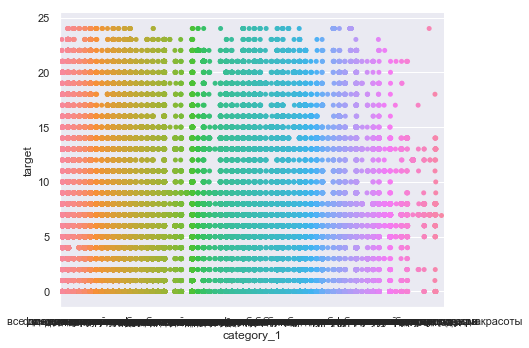

In [126]:
sns.catplot(x='category_1', y='target', data=train, height=5, aspect=1.5);

In [179]:
train.category_1.unique()

array(['все для компьютеров', 'доставка', 'финансовые услуги',
       'одежда для мужчин', 'молочные продукты', 'картины',
       'домашний декор', 'детские товары', 'товары для праздника',
       'личная гигиена', 'кондитерские изделия и сладости', nan,
       'крупы, каши, орехи', 'лекарства', 'обувь', 'товары для сада',
       'кулинария', 'свежая еда', 'запакованная еда', 'фрукты и овощи',
       'лекарства по рецепту', 'одежда для малышей', 'прочее',
       'оптические линзы', 'замороженные продукты', 'беспроводная связь',
       'игрушки', 'женские носки', 'оптика', 'женская одежда',
       'товары для автомобиля', 'товары для кухни',
       'одежда для мальчиков', 'хозяйственные и бытовые товары',
       'товары для дома', 'товары для красоты', 'спортивные товары',
       'постельные принадлежности', 'товары для теплиц',
       'туалетная бумага', 'офисные принадлежности', 'электроника',
       'косметика и аксессуары', 'хлебобулочные изделия', 'алкоголь',
       'книги и журнал

In [161]:
train.category_1.unique()[23]

'оптические линзы'

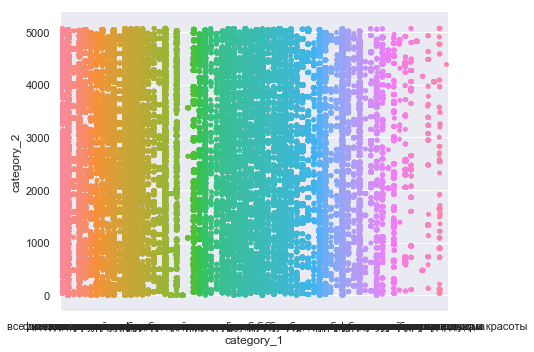

In [156]:
sns.catplot(x='category_1',y = 'category_2', data=train, height=5, aspect=1.5);

In [178]:
train.category_1.unique()

array(['все для компьютеров', 'доставка', 'финансовые услуги',
       'одежда для мужчин', 'молочные продукты', 'картины',
       'домашний декор', 'детские товары', 'товары для праздника',
       'личная гигиена', 'кондитерские изделия и сладости', nan,
       'крупы, каши, орехи', 'лекарства', 'обувь', 'товары для сада',
       'кулинария', 'свежая еда', 'запакованная еда', 'фрукты и овощи',
       'лекарства по рецепту', 'одежда для малышей', 'прочее',
       'оптические линзы', 'замороженные продукты', 'беспроводная связь',
       'игрушки', 'женские носки', 'оптика', 'женская одежда',
       'товары для автомобиля', 'товары для кухни',
       'одежда для мальчиков', 'хозяйственные и бытовые товары',
       'товары для дома', 'товары для красоты', 'спортивные товары',
       'постельные принадлежности', 'товары для теплиц',
       'туалетная бумага', 'офисные принадлежности', 'электроника',
       'косметика и аксессуары', 'хлебобулочные изделия', 'алкоголь',
       'книги и журнал

In [162]:
# x_test[x_test.category_2 == 'op']

In [169]:
x_test.category_1.unique()

array(['личная гигиена', 'картины', 'финансовые услуги',
       'одежда для мужчин', 'ювелирные изделия и солнечные очки',
       'фрукты и овощи', 'крупы, каши, орехи', 'доставка', 'другое',
       'женская одежда', 'хлебобулочные изделия', 'книги и журналы',
       'замороженные продукты', 'беспроводная связь', 'алкоголь',
       'офисные принадлежности', 'постельные принадлежности',
       'кондитерские изделия и сладости', 'оптические линзы',
       'косметика и аксессуары', 'хозяйственные и бытовые товары',
       'товары для праздника', 'лекарства по рецепту',
       'молочные продукты', 'детские товары', 'морепродукты',
       'свежая еда', 'товары для автомобиля', 'лекарства',
       'большие товары для дома', 'все для компьютеров', 'электроника',
       'обувь', 'товары для красоты', 'свежее и замороженное мясо',
       'одежда для беременных', 'запакованная еда',
       'товары для развлечений', 'игровые приставки',
       'одежда для малышей', 'ткани и рукоделие', 'кулинария

In [172]:
train.category_1.unique()[23]

'оптические линзы'

In [174]:
train[train.category_1 == 'оптические линзы'].shape

(52, 8)

In [177]:
x_test[x_test.category_1 == 'оптические линзы']

,check_id,customer_id,time,category_1,category_2,barcode,count
37,2d12759f3096429dcf184ce3a9c2a4b9,NaN,10:12,оптические линзы,3562,68113152803,1
12478,f7e80b38b04e22ad36289d36246a1522,NaN,16:56,оптические линзы,1089,60538899577,1
12481,f7e80b38b04e22ad36289d36246a1522,NaN,16:56,оптические линзы,3562,68113152805,1
12486,c0f7bbe67d3a3e084b0d7758555247e8,NaN,16:57,оптические линзы,3562,7874263939,1
12488,c0f7bbe67d3a3e084b0d7758555247e8,NaN,16:57,оптические линзы,1089,60538899577,1
18212,a5148b6e536d608de42f50fc8cf9aeeb,NaN,21:46,оптические линзы,3562,68113152805,1
20447,d8016332fc949138a76a80bfa67a3494,d0af6e782638f299ce5126aeaaa9de9f,21:22,оптические линзы,3562,68113152804,1
20450,d8016332fc949138a76a80bfa67a3494,d0af6e782638f299ce5126aeaaa9de9f,21:22,оптические линзы,1089,60538899553,1
36655,27fc8fdb48eadd857226d00c3ea71f65,NaN,10:41,оптические линзы,1089,60538899577,1
36657,27fc8fdb48eadd857226d00c3ea71f65,NaN,10:41,оптические линзы,3562,7874263939,1


In [ ]:
train[(train.category_2 > 0) &(train.category_2 < 42)].head()

In [ ]:
x_test

In [125]:
sns.set(rc={'figure.figsize':(40,20)})

In [110]:
train[(train.category_2 > 0) &(train.category_2 < 42)].head()

,check_id,customer_id,time,category_1,category_2,barcode,count,target
54,16e2a2dd4342a5074f9be16676c63004,NaN,10:04,личная гигиена,5,31254742735,1,4
120,6d717afe56cad9ce15b910db721130dd,NaN,10:09,"крупы, каши, орехи",17,3800000110,1,4
240,734e71338f437d3a0bbd98aaed29b8ca,c2f2c06588cdc428d7fb1e1379e52a27,10:17,хлебобулочные изделия,36,7225000486,10,3
386,a3e65978f7de5dceaf34df71e261723e,NaN,10:28,игрушки,31,82001697060,1,8
391,6db5b0f2e1cd0a94b616a32c53e52e4b,NaN,10:28,товары для праздника,5,64541671812,1,8


In [129]:
(499880345.88 / 60) / 60

138855.65163333333

In [49]:
#################### ИЗМЕНИТЬ РАЗМЕРЫ ВИДОВОГО ЭКРАНА ######################
pd.set_option('display.max_columns', 52)
pd.set_option('display.width', 10)